In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
df =pd.read_csv('energy_efficiency_data.csv')

In [56]:
mu = []
std = []

In [57]:
def build_model(input_shapes, n_classes=None):

    # This input will receive all the preprocessed features
    # sent to 'main'
    input_main = Input(shape=input_shapes["main"], name="main")

    x = Dense(64, activation='relu')(input_main)
    x = Dense(64, activation='relu')(x)

    predictions = Dense(1)(x)

    # The 'inputs' parameter of your model must contain the
    # full list of inputs used in the architecture
    model = Model(inputs=[input_main], outputs=predictions)

    return model

In [80]:

def normalize(data):
    for i in range(0,data.shape[1]-1):
        data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
        mu.append(np.mean(data[:,i]))
        std.append(np.std(data[:, i]))

In [81]:
df.head()

,# Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2.0,0.0,0.0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,4.0,0.0,0.0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,5.0,0.0,0.0,15.55,21.33
3,0.90,563.5,318.5,122.50,7.0,2.0,0.0,0.0,20.84,28.28
4,0.90,563.5,318.5,122.50,7.0,3.0,0.0,0.0,21.46,25.38


In [82]:
df.describe

<bound method NDFrame.describe of      # Relative Compactness  Surface Area  Wall Area  Roof Area  \
0                      0.98         514.5      294.0     110.25   
1                      0.98         514.5      294.0     110.25   
2                      0.98         514.5      294.0     110.25   
3                      0.90         563.5      318.5     122.50   
4                      0.90         563.5      318.5     122.50   
..                      ...           ...        ...        ...   
763                    0.71         710.5      269.5     220.50   
764                    0.69         735.0      294.0     220.50   
765                    0.66         759.5      318.5     220.50   
766                    0.64         784.0      343.0     220.50   
767                    0.62         808.5      367.5     220.50   

     Overall Height  Orientation  Glazing Area  Glazing Area Distribution  \
0               7.0          2.0           0.0                        0.0   
1      

In [83]:
data = np.array(df,dtype=float)

In [84]:
normalize(data)

In [85]:
def h(x,theta):
    return np.matmul(x, theta)

In [86]:
def cost_function(x, y, theta):
    return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [87]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
    m = x.shape[0]
    J_all = []
    
    for _ in range(num_epochs):
        h_x = h(x, theta)
        cost_ = (1/m)*(x.T@(h_x - y))
        theta = theta - (learning_rate)*cost_
        J_all.append(cost_function(x, y, theta))

    return theta, J_all 

In [88]:
y = data[:, -1]
y = np.reshape(y, (768,1))


In [89]:
x=data[:,:9]
x = np.hstack((np.ones((x.shape[0],1)), x))

In [90]:
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cooling Load: ", J)
print("Parameters: ", theta)


Cost:  [[2.85771265]]
Parameters:  [[24.46104063]
 [-0.12442841]
 [-0.58660167]
 [ 1.12760775]
 [-1.11660467]
 [ 2.34400272]
 [ 0.14671426]
 [ 0.77038401]
 [-0.09268911]
 [ 4.87000855]]


In [105]:
def plot_cost(J_all, num_epochs):
    plt.xlabel('Epochs')
    plt.ylabel('Cooling Load')
    plt.plot(num_epochs, J_all, 'm', linewidth = "5")
    plt.show()

In [106]:
def test(theta, x):
    x[0] = (x[0] - mu[0])/std[0]
    x[1] = (x[1] - mu[1])/std[1]

    y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
    n_epochs = []
    jplot = []
    count = 0
    for i in J_all:
        jplot.append(i[0][0])
        n_epochs.append(count)
        count += 1
    jplot = np.array(jplot)
    n_epochs = np.array(n_epochs)
    plot_cost(jplot, n_epochs)

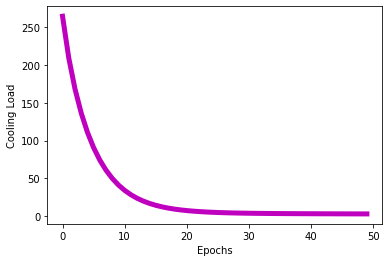

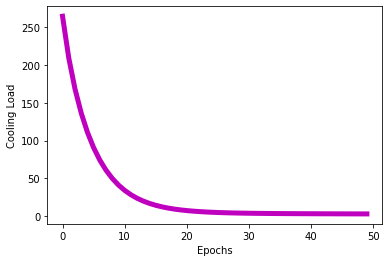

In [107]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
    jplot.append(i[0][0])
    n_epochs.append(count)
    count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

test(theta, [1800, 3])